In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import korean_language

In [5]:
2**3

8

In [6]:
import cv2

In [8]:
img = cv2.imread('./pool.jpg')

In [9]:
img.shape

(3024, 4032, 3)

In [12]:
img[1].shape

(4032, 3)

In [13]:
type(img)

numpy.ndarray

In [19]:
img[0:1,0:1]

array([[[87, 86, 76]]], dtype=uint8)

In [42]:
img[3023][4031]

array([202, 178, 102], dtype=uint8)

In [43]:
img[3023,4031]

array([202, 178, 102], dtype=uint8)

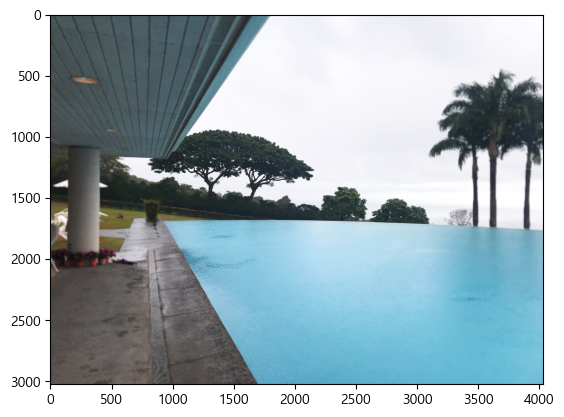

In [49]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

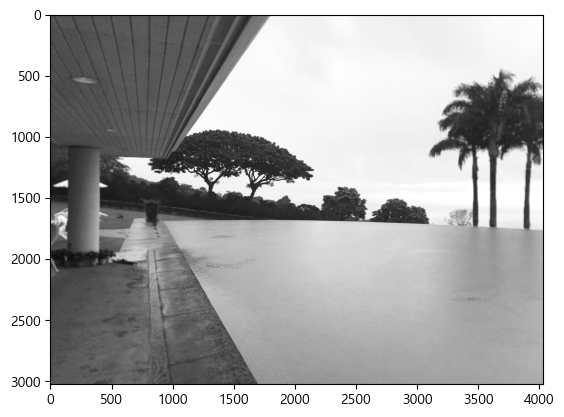

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')


In [54]:
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

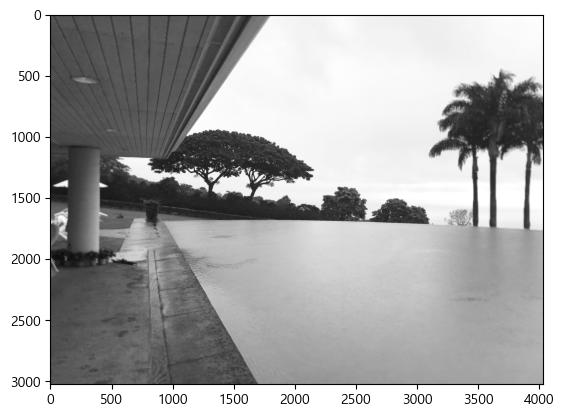

In [56]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
shap = cv2.filter2D(img2,-1, kernel)
plt.imshow(shap, cmap='gray')

In [58]:
median_v = np.median(img2)

In [57]:
np.median(img2)

166.0

In [60]:
lwr = int(max(0, (1.0 -0.33) * median_v))
upp = int(max(255, (1.0  + 0.33) * median_v))
lwr, upp

(111, 255)

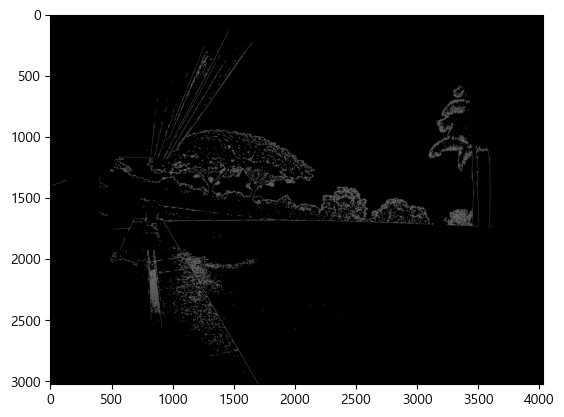

In [66]:
img_canny = cv2.Canny(img2,lwr, upp)
plt.imshow(img_canny, cmap='gray')
plt.show()

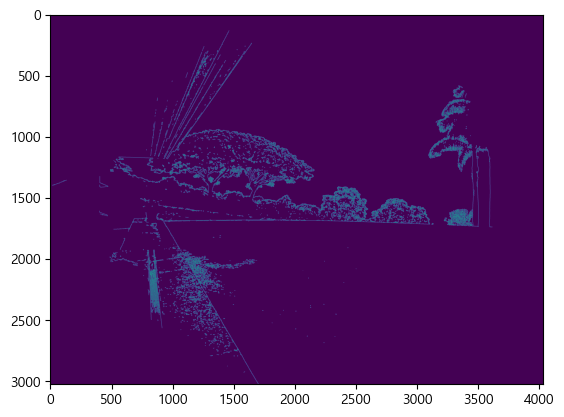

In [68]:
img_canny = cv2.Canny(img2,lwr, upp)
plt.imshow(img_canny)
plt.show()

### 얼굴인식
#### haar-like
#### 사람얼굴에는 공통된 특징이 있어서 모든 사람의 눈 코 입 부분의 명암이 매우 유사한 패턴을 가짐
#### cascade방식 : 사람얼굴 고유의 특징을 데이터베이스화하여 이미지에서 추출하는 방법 사용
#### - 전체 특징을 여러 분류기 단계로 그룹화 단계별로 하나씩 적용

In [70]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  660k  100  660k    0     0   827k      0 --:--:-- --:--:-- --:--:-- 6478k


In [72]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1EE3-52DA

 C:\python\study\cnu2023 디렉터리

2023-11-11  오전 11:30    <DIR>          .
2023-08-31  오후 05:12    <DIR>          ..
2023-11-11  오전 10:31    <DIR>          .ipynb_checkpoints
2023-10-28  오후 02:39           402,485 10week_sat_decisiontree.ipynb
2023-10-28  오후 03:37           331,560 10week_sat_randomforest.ipynb
2023-10-25  오후 09:50           668,153 10week_web_KNN.ipynb
2023-11-08  오후 07:30           178,513 11week_sat_분류성능.ipynb
2023-11-04  오전 09:58           107,104 11week_web_svm.ipynb
2023-11-11  오전 11:30           944,582 12week_sat_이미지분석.ipynb
2023-11-11  오전 10:30         1,878,667 12week_web_이미지분석.ipynb
2023-11-08  오후 09:15           445,089 12week_web_특성공학.ipynb
2023-09-02  오후 03:51           270,120 2week.ipynb
2023-08-30  오후 10:20             7,480 2week_web.ipynb
2023-09-09  오후 03:06           170,291 3week_sat_dataframe.ipynb
2023-09-06  오후 10:32           385,101 3week_web.ipynb
2023-09-09  오후 03:53            21,334 3wwek_sat_Fil

### 얼굴검출 모델 생성

In [80]:
cascade_file = 'haar.xml'
ccade = cv2.CascadeClassifier(cascade_file)

In [75]:
!curl -L https://dropbox.com/s/88q6oxlu03twfze/families.jpg -o family.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    58    0    58    0     0     51      0 --:--:--  0:00:01 --:--:--    56
100    58    0    58    0     0     51      0 --:--:--  0:00:01 --:--:--    56

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100   297  100   297    0     0    132      0  0:00:02  0:00:02 --:--:--  2516

100 1733k  100 1733k    0     0   573k      0  0:00:03  0:00:03 --:--:--  573k


In [77]:
img = cv2.imread('./family.jpg')

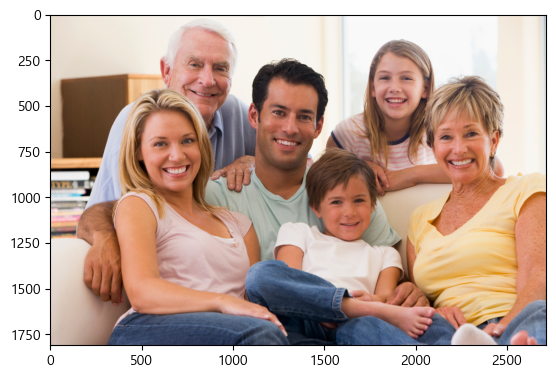

In [78]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [79]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### detectMultiScale : 사람얼굴을 검출한 사각형 좌표값(시작점(좌,우),  너비, 높이)을 반환

In [83]:
face_list = ccade.detectMultiScale(img_gray, minSize=(150,150))

In [82]:
face_list

array([[ 676,  144,  381,  381],
       [1736,  231,  313,  313],
       [1126,  393,  401,  401],
       [1472,  906,  322,  322],
       [2065,  535,  352,  352],
       [ 482,  551,  396,  396]])

얼굴 좌표 :  676 144 381 381
얼굴 좌표 :  1736 231 313 313
얼굴 좌표 :  1126 393 401 401
얼굴 좌표 :  2065 535 352 352
얼굴 좌표 :  482 551 396 396
얼굴 좌표 :  1472 906 322 322


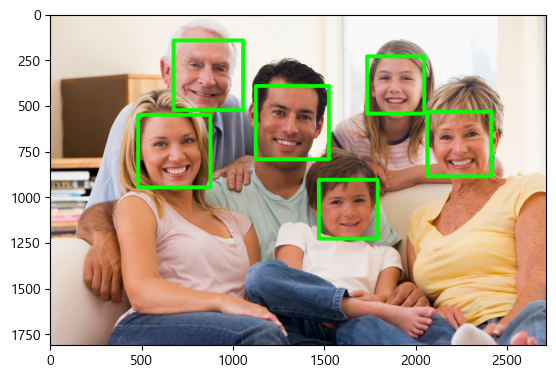

In [86]:
for x,y ,w,h in face_list:
    print('얼굴 좌표 : ',x,y,w,h)
    red = (0,255,0)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)
    
cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [85]:
for x,y ,w,h in face_list:
    print('얼굴 좌표 : ',x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)
    

얼굴 좌표 :  676 144 381 381
얼굴 좌표 :  1736 231 313 313
얼굴 좌표 :  1126 393 401 401
얼굴 좌표 :  2065 535 352 352
얼굴 좌표 :  482 551 396 396
얼굴 좌표 :  1472 906 322 322


### 일부분 슬라이싱 처리 

In [88]:
slice = img_gray[y:y+h, x:x+w]
slice

array([[ 54,  53,  54, ..., 135, 132, 124],
       [ 49,  51,  52, ..., 131, 129, 127],
       [ 50,  53,  50, ..., 131, 132, 129],
       ...,
       [213, 213, 213, ..., 137, 138, 134],
       [214, 214, 214, ..., 133, 135, 133],
       [213, 214, 214, ..., 131, 131, 134]], dtype=uint8)

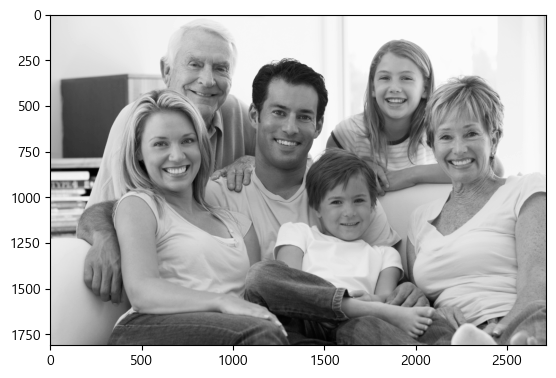

In [89]:
cv2.imwrite('face-pickup.png', slice)
plt.imshow(img_gray, cmap='gray')
plt.show()

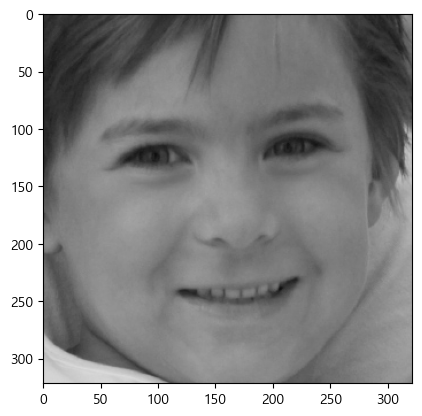

In [91]:
plt.imshow(cv2.imread('./face-pickup.png'), cmap='gray')

### 얼굴 모자이크 처리

In [92]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출
    (x1, y1, x2, y2) = rect # 사각형 위치(x1 : x시작점, x2 : x끝점, y1 : y시작점, y2 : y끝점)
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2] # 자른 이미지를 저장
    
    #축소하고 확대
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small, (w,h), interpolation = cv2.INTER_AREA)
    
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [94]:
for x,y ,w,h in face_list:
    img = mosaic(img, (x,y, x+w, y+h), 10)   

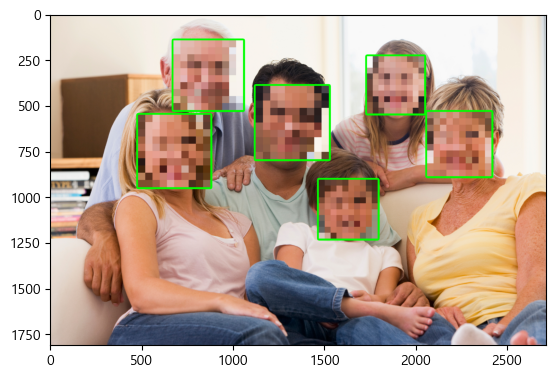

In [95]:
cv2.imwrite('face-mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 손글씨 숫자 인식 

In [96]:
from sklearn.datasets import load_digits

In [97]:
digit = load_digits()

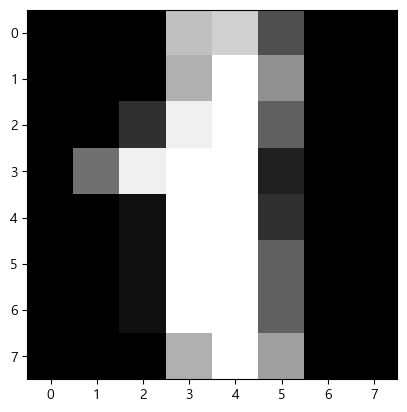

In [98]:
plt.imshow(digit.images[1], cmap='gray')
plt.show()

In [101]:
print(digit.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


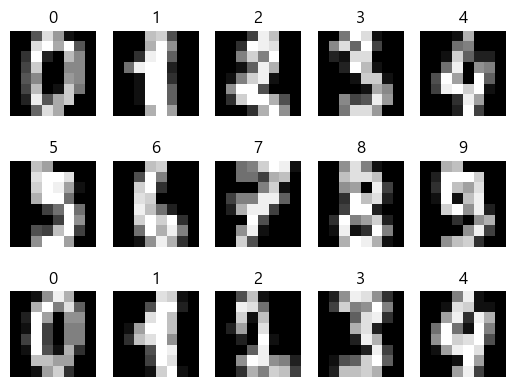

In [103]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis('off')
    plt.title(str(digit.target[i]))
    plt.imshow(digit.images[i],cmap='gray')
plt.show()
              

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

In [108]:
x = digit.data
x = x.reshape(-1,64)
y = digit.target
y.shape,x.shape

((1797,), (1797, 64))

In [110]:
x[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [111]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25)

In [112]:
svc = svm.LinearSVC()
svc.fit(train_x, train_y)

C:\python\ml308\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [113]:
y_pred = svc.predict(test_x)

In [115]:
print(accuracy_score(test_y, y_pred))

0.9511111111111111


### 모델저장

In [117]:
import joblib

In [118]:
joblib.dump(svc, 'digits.pkl')

['digits.pkl']

In [119]:
def pred_digit(file):
    model = joblib.load('./digits.pkl')
    
    my_img = cv2.imread(file)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8,8))  # 입력한 이미지의 크기를 조정
    my_img = 15 - my_img // 16  # 이미지 픽셀 값(0~255 사이의 값)을 0~16사이의 값으로 변환하고 그결과값을 15로 빼서 색상을 반전
    
    my_img = my_img.reshape(-1,64)
    res = model.predict(my_img)
    return res[0]

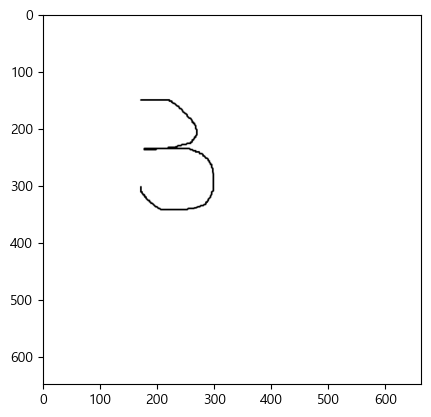

In [121]:
img = cv2.imread('./digit3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

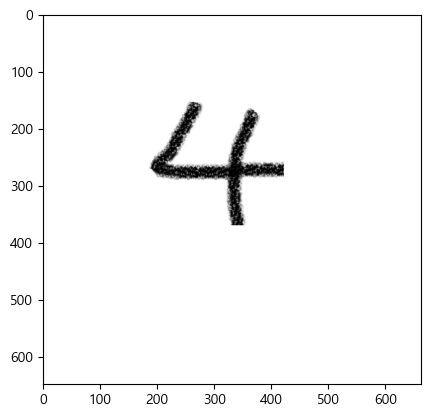

In [123]:
img = cv2.imread('./digit4.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

digit4.png = 5


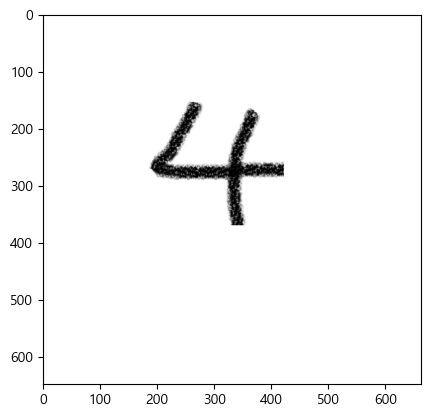

In [125]:
img = cv2.imread('./digit4.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n_digit = pred_digit('./digit4.png')
print('digit4.png = '+ str(n_digit))
plt.show()
      

digit7.png = 4


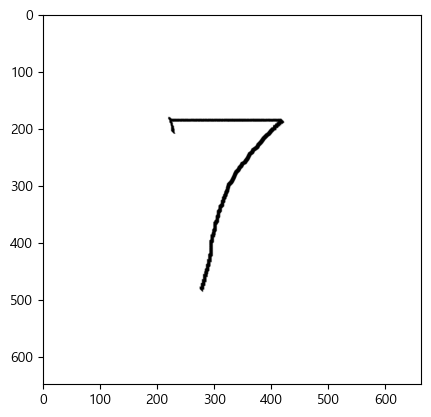

In [127]:
img = cv2.imread('./digit7.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n_digit = pred_digit('./digit7.png')
print('digit7.png = '+ str(n_digit))
plt.show()

### 이미지 윤곽 추출 & 숫자인식
#### opencv findContours() : 이미지 윤곽 추출
#### - 이미지 읽어오기 > 그레이스케일 > 노이즈제거를 위해 블러 처리

In [128]:
!curl -L http://dropbox.com/s/sgbgz5ese6ytjx9/im-circle-box.png -o im-circle.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100    63    0    63    0     0    119      0 --:--:-- --:--:-- --:--:--   119
100    63    0    63    0     0    118      0 --:--:-- --:--:-- --:--:--     0

100   297  100   297    0     0    266      0  0:00:01  0:00:01 --:--:--   266

  0  180k    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0  180k    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  180k  100  180k    0     0  60923      0  0:00:03  0:00:03 --:--:--  250k


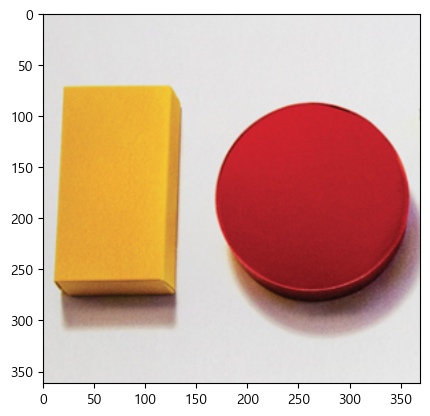

In [129]:
img = cv2.imread('./im-circle.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 흑백으로 변환

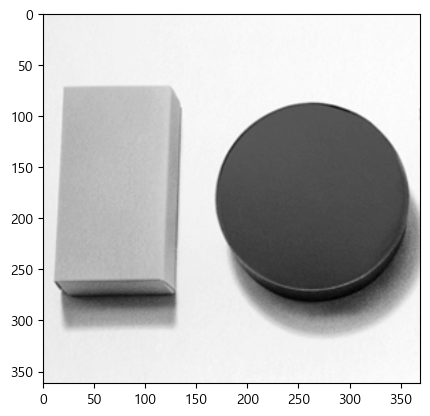

In [132]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

#### GaussianBlur( 이미지, 윈도우크기, 표준편차) - 노이즈를 제거하기 위함

In [133]:

gray1 = cv2.GaussianBlur(gray, (7,7), 0)

In [136]:
# 이미지를 흑백으로 변환
# threshold(이미지, 임계값, 변환값을 반전) 결과값을 2개 반환 12번 : 데이터
ret, img2 = cv2.threshold(gray1, 215, 301, cv2.THRESH_BINARY_INV)

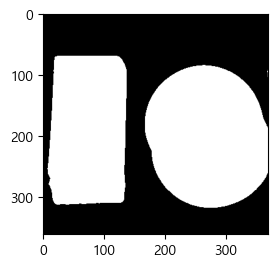

In [137]:
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')

In [138]:
ret

215.0

### https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
#### cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None) -> contours, hierarchy  결과를 두개 반환
#### - image: 입력 영상. non-zero 픽셀을 객체로 간주함.
#### - mode: 외곽선 검출 모드. cv2.RETR_로 시작하는 상수.
#### - method: 외곽선 근사화 방법. cv2.CHAIN_APPROX_로 시작하는 상수.
#### - contours: 검출된 외곽선 좌표. numpy.ndarray로 구성된 리스트. len(contours)=전체 외곽선 개수(N). contours[i].shape=(K, 1, 2). contours[i].dtype=numpy.int32.
#### - hierarchy: 외곽선 계층 정보. numpy.ndarray. shape=(1, N, 4). dtype=numpy.int32. hierarchy[0, i, 0] ~ hierarchy[0, i, 3]이 순서대로 next, prev, child, parent 외곽선 인덱스를 가리킴. 해당 외곽선이 없으면 -1.
#### - offset: 좌표 값 이동 옵셋. 기본값은 (0, 0).

In [148]:
cnts, ret1 = cv2.findContours(img2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

*
*
*
167 85 203 234
*
7 70 130 244


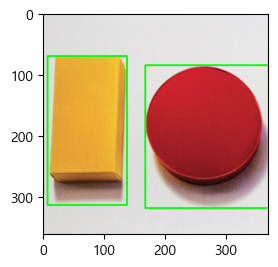

In [150]:
for c in cnts:
    print('*')
    x,y,w,h = cv2.boundingRect(c)
    
    if w < 5 or w > 300: continue  #5보다 작거나 300보다 크면 다시 반복하고 그렇지 않으면 아래 스크립트 실행
    print(x,y,w,h)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 우편번호 읽기 

In [157]:
def detect_no(fname):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    ret, im2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    
    cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    result = []
    
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        if not(20 < w < 100): continue
        result.append([x,y,w,h])
        
    result = sorted(result, key = lambda col: col[0])  #첫번째 열인 x값 기준으로 정렬
    
    for x, y, w, h in result:
        cv2.rectangle(img, (x , y) , (x + w, y + h), (0,255,0), 3)
        
    return result, img

In [152]:
!curl -L https://dropbox.com/s/8qlxytrdn3ffaov/im-hagak1.png -o img_post.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100    59    0    59    0     0    125      0 --:--:-- --:--:-- --:--:--   125

100   297  100   297    0     0    342      0 --:--:-- --:--:-- --:--:--   342

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  133k  100  133k    0     0   105k      0  0:00:01  0:00:01 --:--:--  756k


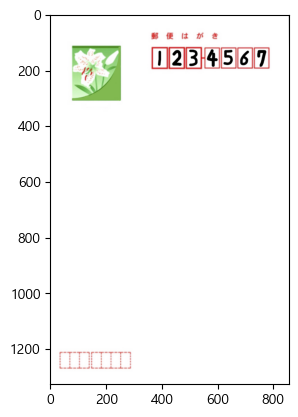

In [158]:
img = cv2.imread('./img_post.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

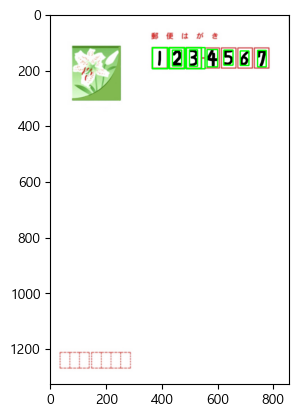

In [159]:
cnts, img = detect_no('./img_post.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

C:\python\ml308\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\python\ml308\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\python\ml308\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\python\ml308\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\python\ml308\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwis

ValueError: num must be an integer with 1 <= num <= 8, not 9

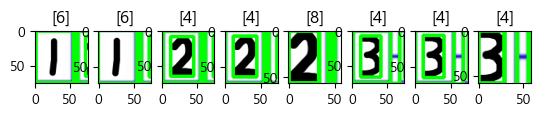

In [164]:
model = joblib.load('./digits.pkl')

cnts, img = detect_no('./img_post.png')

for i ,pt in enumerate(cnts):
    x, y, w, h = pt
    im2 = img[y:y+h, x:x+h]
    
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    im2gray = cv2.resize(im2gray, (8,8))
    im2gray = 15 - im2gray // 16
    im2gray = im2gray.reshape(-1, 64)
    
    res = model.predict(im2gray)
    plt.subplot(1, 8, i+1)
    plt.imshow(im2)
    plt.title(res)
    
plt.show()


### 동영상처리 
#### videowriter(출력파일명, 코덱정보, 프레임, 영상사이즈) 프레임 : 1초단위 사진수
#### VideoCapture.read() 비디오의 한 프레임씩 읽음
#### while (조건) 조건이 True시까지 무한 반복으로 수행문장에서 빠져 나오는 조건을 만들어야 함

In [165]:
cap = cv2.VideoCapture(0)
fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
fps = 20.0
size = (640,360)
writer = cv2.VideoWriter('test2.m4v', fmt, fps, size) # 영상을 저장

In [166]:
while True:
    _, frame = cap.read() #프레임 하나씩 읽어오기
    frame = cv2.resize(frame, size)  # 사이즈 조정
    writer.write(frame) #프레임을 저장
    cv2.imshow('frame_title',frame)  #윈도우창 제목은 frame_title이고 frame을 보여줌 
    if cv2.waitKey(1) == 13: break # 1밀리세컨드를 대기하다가 13(키보드 엔터키)이 들어오면 빠져나감
    
writer.release()  #동영상 저장 마침
cap.release()  #동영상 받아들이는것을 멈춤
cv2.destroyAllWindows()   #동영상재생창을 닫음 - 동영상창을 엔터치면 빠져나옴

### 붉은색 성분만 남기는 실습 

In [167]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read() #프레임 하나씩 읽어오기
    frame = cv2.resize(frame, (500,300))  # 사이즈 조정
    
    frame[:,:,0] = 0  #파란색을 0으로 조정
    frame[:,:,1] = 0  #초록색을 0으로 조정
    cv2.imshow('red camera',frame)  #윈도우창 제목은 frame_title이고 frame을 보여줌 
    if cv2.waitKey(1) == 13: break # 1밀리세컨드를 대기하다가 13(키보드 엔터키)이 들어오면 빠져나감
    
cap.release()  #동영상 받아들이는것을 멈춤
cv2.destroyAllWindows()   #동영상재생창을 닫음 - 동영상창을 엔터치면 빠져나옴

### 움직임 검출 : 앞뒤 프레임영상의 차이를 추적하는 방법

In [172]:
cap = cv2.VideoCapture(0)

In [173]:
img_last = None
green = (0, 255, 0)


In [176]:
while True:
    _, frame = cap.read() #프레임 하나씩 읽어오기
    frame = cv2.resize(frame, (500,300))  # 사이즈 조정
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  #흑백 이미지로 변환
    gray = cv2.GaussianBlur(gray, (9,9), 0)
    ret, img_b = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    
    if img_last is None:
        img_last = img_b
        continue
    
    frame_diff = cv2.absdiff(img_last, img_b) # 두이미지의 차이를 구함
    cnts = cv2.findContours(frame_diff, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if w < 50: continue
        
        cv2.rectangle(frame, (x,y), (x + w, y + h), green, 2)
        
    img_last = img_b  # 프레임을 변수에 저장
    
    cv2.imshow('Diff Camera', frame)
    cv2.imshow('Diff Data', frame_diff)

    if cv2.waitKey(1) == 13: break # 1밀리세컨드를 대기하다가 13(키보드 엔터키)이 들어오면 빠져나감
    
cap.release()  #동영상 받아들이는것을 멈춤
cv2.destroyAllWindows()   #동영상재생창을 닫음 - 동영상창을 엔터치면 빠져나옴